<a href="https://colab.research.google.com/github/binaria010/Control-for-Spacecraft-Attitude-Motion/blob/master/Segunda%20Parte/MinimosCuadrados/Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión funcional: Minimos cuadrados para ajustes que son sumas de funciones


Dados un conjunto de datos $(x_1,y_1),\dots,(x_N,y_N)$ Buscamos un ajuste de la forma:

$$
f(x) = \alpha_1\phi_1(x) +\alpha_2\phi_2(x) +\dots +\alpha_m\phi_m(x)
$$

donde las funciones $\phi_1,\dots,\phi_m$ son dadas (conocidas) y los coeficientes $\alpha_1,\dots,\alpha_m$ se determinan a partir de minimos cuadrados. Es decir, para el conjunto de datos dado y las funciones, los valores óptimos de los coeficientes se encuentran como:

$$
(\alpha_1^*,\dots,\alpha_m^{*} )= \arg\min_{\alpha_1,\dots,\alpha_m\in R} \sum_{i=1}^N \left[y_i - (\alpha_1\phi_1(x_i) + \alpha_2\phi_2(x_i) +\dots +\alpha_m\phi_m(x_i))\right]^2
$$




como antes, se tienen las ecuaciones normales para calcular los coneficientes en términos de los datos:

$$
\begin{bmatrix}
\alpha_1^* \\ \alpha_2^* \\ \vdots \\ \alpha_m^*
\end{bmatrix} = (\Phi^T \Phi)^{-1}(\Phi^T {\bf y})
$$

donde:

$$
\Phi =\begin{bmatrix}
\phi_1(x_1) & \phi_2(x_1) & \phi_3(x_1) & \cdots & \phi_m(x_1)\\
\phi_1(x_2) & \phi_2(x_2) & \phi_3(x_2) & \cdots & \phi_m(x_2)\\
\phi_1(x_3) & \phi_2(x_3) & \phi_3(x_3) & \cdots & \phi_m(x_3)\\
\vdots      &  \vdots     &   \vdots    & \ddots & \vdots \\
\phi_1(x_N) & \phi_2(x_N) & \phi_3(x_N) & \cdots & \phi_m(x_N)
\end{bmatrix} \qquad {\bf y} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_N \end{bmatrix}
$$

## Ejercicio 12:

Implementar una función que reciba como input dos vectores $x$ e $y$ y una lista de funciones y devuelva los coeficientes de la combinación lineal de las funciones que mejor ajuste los datos en el sentido de cuadrados mínimos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def reg_funcional(x, y, funciones):

  """
  esta funcion calcula la mejor regresion de la forma a_1 h_1(x) + a_2*h2(x) +a_3h_3(x) + ... +a_m*h_m(x)
  """

  m = len(funciones)  #cantidad de funciones a usar
  N = len(x)          # cantidad de observaciones

  Phi = np.zeros((N, m))
  

  for j in range(m):

    Phi[:, j] = funciones[j](x)

  coefs = np.linalg.solve(Phi.T @ Phi, np.dot(Phi.T , y))  # la componente 0 es el termino idependiente en caso de que phi_0 =1

  return coefs
  





## Ejemplo: 

Dados los datos:

$$
\begin{array}{l c c c c c c c c c c c c}\\
x & 8 & 15 &  6 &  9 & 17 & 12 &  4 &  3 & 14 & 20 & 18 &  2\\
y &  19.59 & 41.06 & 17 & 23.64 & 50.47 & 34.68 & 10.9 &  4.52 & 37.84 & 55.98 & 54.03 &  1.27
\end{array}
$$


con una funcion del tipo $$f(x) = \alpha_1 + \alpha_2x 
+ \alpha_3\cos\left( \frac{\pi}{3} x \right)
+ \alpha_4\sin\left( \frac{\pi}{3} x\right)$$ 


* Usar el metodo de minimos cuadrados para hacer este ajuste.
	
* Graficar simultaneamente los datos de la tabla y la funcion obtenida.

In [ ]:
x = np.array([8 , 15 ,  6 ,  9 , 17 , 12 ,  4 ,  3 , 14 , 20 , 18 ,  2])
y = np.array([19.59 , 41.06 , 17 , 23.64 , 50.47 , 34.68 , 10.9 ,  4.52 , 37.84 , 55.98 , 54.03 ,  1.27])


In [ ]:
f1 = lambda x: 1
f2 = lambda x: x
f3 = lambda x: np.cos(np.pi/3 * x)
f4 = lambda x: np.sin(np.pi/3 * x)


funciones = [f1, f2,f3, f4]


[a1, a2, a3, a4] = reg_funcional(x, y, funciones)

In [ ]:
print("los coeficientes son: a1 = ", a1, "a2 = " ,a2, "a3 = ", a3, "a4 = ", a4)

los coeficientes son: a1 =  -2.6015166106054934 a2 =  3.0298075139014555 a3 =  1.4197369394596573 a4 =  -1.603699245462579


In [ ]:
f = lambda x: a1* f1(x) + a2* f2(x) + a3 * f3(x) + a4* f4(x)

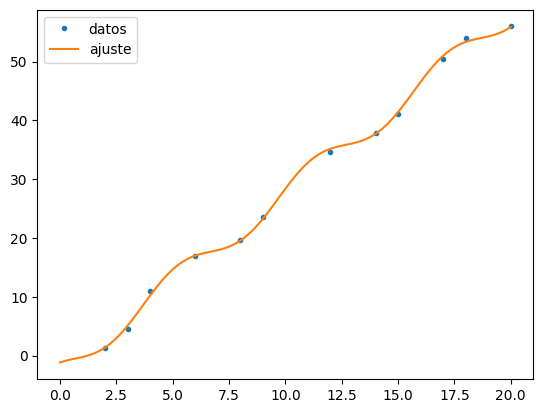

In [ ]:
# ploteamos datos y ajuste:

grilla = np.linspace(0, 20, 100)

plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f(grilla), label = "ajuste")
plt.legend()
plt.show()


Bondad del ajuste: la medimos con el $R^2$:

In [ ]:
def R2(f, x,y):

  """
  Esta funcion calcula el r^2 de la regresion lineal dados los datos x, y
  """
  
  y_predicho = f(x)
  avg_y = np.mean(y)

  numerador = np.sum((y_predicho - avg_y)**2)
  denominador = np.sum((y - avg_y)**2)

  return numerador/denominador

In [ ]:
R2(f, x, y)

0.9994777935548501

### Ejercicio: resolver el problema 13 practica 5

## Regresion polinomial:
Un caso particular de lo anterior es cuando:

$$
\phi_0(x) =1,\quad \phi_1(x) = x, \quad \phi_2(x) =x^2,\dots, \phi_m(x)=x^m
$$

en dicho caso la funcion de ajuste es de la forma:
$$
f(x) = \alpha_0 +\alpha_1 x +\alpha_2 x^2 +\dots +\alpha_m x^m
$$

y se llama una regresion polinomial.



### Ejemplo:

Para los datos

$$
\begin{array}{l c c c c c c c c c c c c}
x & 1.4 & 2.8 & 1.0 & 1.6 & 3.4 & 2.2 & 0.6 & 0.4 & 2.4 & 3.8 & 4.0 & 3.6\\
y & -0.86 & -17.54 &  1.36 &   0.52 & -43.22 & -6.03 & 3.89 & 1.70 &  -7.61 & -72.19 & -91.51 & -57.47
\end{array}
$$



Hallar un ajuste polinomial de grado 4 de la forma 

$$
f(x) =\alpha_0 + \alpha_1 x+\alpha_2x^2+\alpha_3x^3 +\alpha_4 x^4
$$

In [ ]:
x = np.array([1.4, 2.8, 1.0, 1.6, 3.4, 2.2, 0.6, 0.4, 2.4, 3.8, 4.0, 3.6])

y = np.array([ -0.86, -17.54,   1.36,   0.52, -43.22,  -6.03,   3.89,   1.70,  -7.61, -72.19, -91.51, -57.47])

In [ ]:
f0 = lambda x: 1
f1 = lambda x: x
f2 = lambda x: x**2
f3 = lambda x: x**3
f4 = lambda x: x**4

funciones = [f0, f1, f2, f3, f4]

[a0,a1,a2,a3,a4] = reg_funcional(x, y, funciones)

print("los coeficientes son en orden ascendiente del grado: ", a0, a1, a2, a3, a4)

los coeficientes son en orden ascendiente del grado:  2.769480221276939 0.5934075230781792 -3.1509624639890257 2.093397242666852 -0.704453798873898


In [ ]:
# para ver la funcion de ajuste como un objeto polinomio de numpy ordenamos los coeficientes en orden descendiente del grado:

coeffs = [a0,a1,a2,a3,a4][::-1]

print(coeffs)

[-0.704453798873898, 2.093397242666852, -3.1509624639890257, 0.5934075230781792, 2.769480221276939]


In [ ]:
#la fucnion de ajuste definidad como un polinomio es:

f = np.poly1d(coeffs)

print(f)

         4         3         2
-0.7045 x + 2.093 x - 3.151 x + 0.5934 x + 2.769


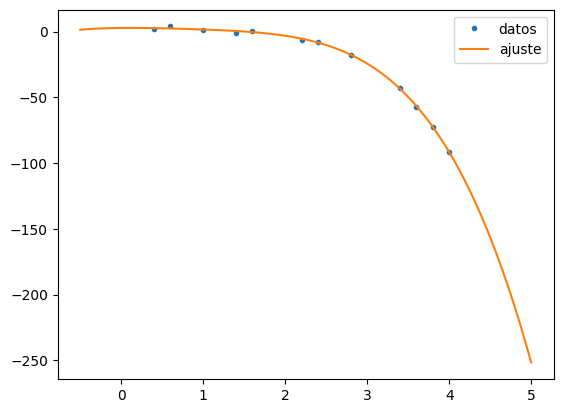

In [ ]:
# ploteemos los datos y el polinomio ajustado

grilla = np.linspace(-0.5, 5, 100)

plt.plot(x, y, ".", label = "datos")
plt.plot(grilla, f(grilla), label = "ajuste")
plt.legend()
plt.show()

## Funcion Regresion Polinomial

Definamos uns funcion de regresion polinomial, de esta forma no tenemos que ingresar la lista de funciones $[1, x, x^2,\dots,, x^n]$ a la rutina ``` reg_funcional```

Esta funcion recibe como inputs los datos $x,y$ y el grado del polinomio que queremos ajustar por minimos cuadrados:

$$
f(x) = a_0 +a_1x +a_2x^2 +\dots +a_mx^m
$$

las ecuaciones normales que determinan los coeficientes $a_0,\dots, a_m$ son:

$$
X^TX \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_m \end{bmatrix} = X^T{\bf y}
$$

donde 

$$X = \begin{bmatrix} 
1 & x_1 & x_1^2 & \cdots & x_1^m\\
1 & x_2 & x_2^2 & \cdots & x_2^m\\
1 & x_3 & x_3^2 & \cdots & x_3^m\\
\vdots  &\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^m
\end{bmatrix}  \qquad {\bf y} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_N \end{bmatrix}
$$




In [ ]:
def reg_polinomial(x, y, m):

  """
  esta fucnion devuelve el polinomio de grado m de minimos cuadrados.
  """
  N = len(x)  # cuantos datos tenemos para ajustar
  X = np.ones((N, m+1))  
  X[:, 1] = x

  for j in range(2, m+1):
    X[:, j] = x**j

  
  coefs = np.linalg.solve(X.T @ X, np.dot(X.T, y ))

  coefs = coefs[::-1]  # revierte el orden  de coeficientes de mayor grado a menor

  f = np.poly1d(coefs)

  return f


In [ ]:
# resolvamos el mismo ejemplo usando esta rutina:

x = np.array([1.4, 2.8, 1.0, 1.6, 3.4, 2.2, 0.6, 0.4, 2.4, 3.8, 4.0, 3.6])

y = np.array([ -0.86, -17.54,   1.36,   0.52, -43.22,  -6.03,   3.89,   1.70,  -7.61, -72.19, -91.51, -57.47])

m = 4

f = reg_polinomial(x, y, n)
print(f)

         4         3         2
-0.7045 x + 2.093 x - 3.151 x + 0.5934 x + 2.769
